In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#a
x1o, y1o = -10, 0.5 #in m
x2o, y2o = 0, -0.5 #in m
v1o = 10 #in m/s in the x direction
v2o = 0 #at rest
sep_dist = 10 #in m
b = 1 #in m
k = 1 #in N
m = 1 #in kg

In [17]:
def dz_dt(z, t, k, b, m1, m2):
    z1, z2, z3, z4, z5, z6, z7, z8 = z
    #case made such that denom of a DE is non-zero
    r21 = np.sqrt((z5-z1)**2+(z7-z3)**2)
    eps = 1e-6
    if r21 < eps:
        r21 = eps
    #differential equation for the force
    fac = -k * b ** 2 / r21 ** 2
    #list describing the system of ODE's
    dzdt = [z2, fac*(z5-z1)/m1, z4, fac*(z7-z3)/m1,\
            z6, -fac*(z5-z1)/m2, z8, -fac*(z7-z3)/m2]
    return dzdt

In [18]:
#initial conditions
z0 = [x1o,v1o,y1o,0,x2o,v2o,y2o,v2o]
from scipy.integrate import odeint

In [5]:
t_start = 0.
t_end = 20
nt = 10000 # the number of integration time steps

t = np.linspace(t_start, t_end, nt)

In [19]:
#solving the ODE
sol = odeint(dz_dt, z0, t, args=(k,b,m,m))

In [21]:
m1_x = sol[:,0]
m1_y = sol[:,2]
m2_x = sol[:,4]
m2_y = sol[:,6]
r1 = []
r2 = []
#running through the solutions
#finding the distances of the particles
#from the origin
for i,j in zip(m1_x,m1_y):
    o = np.sqrt(i ** 2 + j ** 2)
    r1.append(o)
for i,j in zip(m2_x,m2_y):
    o = np.sqrt(i ** 2 + j ** 2)
    r2.append(o)

In [22]:
#limits the solutions to when the
#particles are within a 10m distance of 
#eachother
count = 0
for i,j in zip(r1, r2):
    if abs(i - j) >= 10:
        break
    else:
        count += 1

In [23]:
#limiting the solutions
m1_x = m1_x[:count]
m1_y = m1_y[:count]
m2_x = m2_x[:count]
m2_y = m2_y[:count]

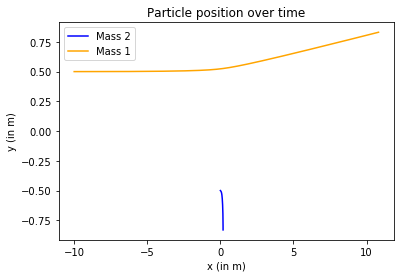

In [10]:
plt.plot(m2_x, m2_y, color = "blue", label = "Mass 2")
plt.plot(m1_x, m1_y, color = 'orange', label = "Mass 1")
plt.title("Particle position over time")
plt.xlabel("x (in m)")
plt.ylabel("y (in m)")
plt.legend()

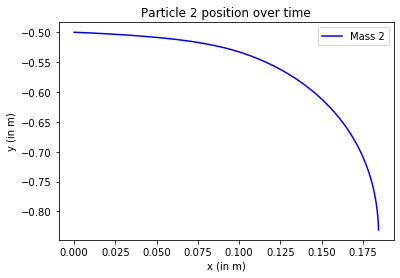

In [11]:
plt.plot(m2_x, m2_y, 'b', label = "Mass 2")
plt.title("Particle 2 position over time")
plt.xlabel("x (in m)")
plt.ylabel("y (in m)")
plt.legend()

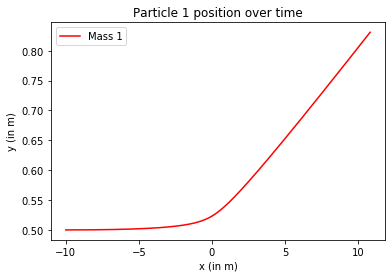

In [12]:
plt.plot(m1_x, m1_y, 'r', label = "Mass 1")
plt.title("Particle 1 position over time")
plt.xlabel("x (in m)")
plt.ylabel("y (in m)")
plt.legend()

In [24]:
#b
#arbitrary point in the list after the deflection
nn = 10
#solving for angles created
tan_alpha2 = (m2_y[-nn]-m2_y[-1])/(m2_x[-nn]-m2_x[-1])
alpha2 = 180.*(np.arctan(tan_alpha2)/np.pi)

tan_alpha1 = (m1_y[-nn]-m1_y[-1])/(m1_x[-nn]-m1_x[-1])
alpha1 = 180.*(np.arctan(tan_alpha1)/np.pi)

In [25]:
print("Particle 1's deflection angle was",round(alpha1,2), "degrees")
print("Particle 2's deflection angle was",round(alpha2,2), "degrees")
tot_ang = alpha1 - alpha2
print("The sum of the two angles is", round(tot_ang), "degrees,", \
     "which is different from 90 degrees by",
      round(abs(tot_ang - 90)), "degrees")

Particle 1's deflection angle was 1.78 degrees
Particle 2's deflection angle was -89.33 degrees
The sum of the two angles is 91.0 degrees, which is different from 90 degrees by 1.0 degrees


In [29]:
#c
#each ball's velocity as the last measurement before it hit
#10m apart
v1f = sol[:,1][count]  + sol[:,5][count] 
v2f = sol[:,3][count]  + sol[:,7][count] 
#finding the momentum of each ball
p1f = m * v1f
p2f = m * v2f

In [33]:
p1o = m * v1o
tot_mom = np.sqrt(p1f ** 2 + p2f ** 2)
print("The vector sum of the final momenta for the particles is", \
     round(tot_mom,5), "kgm/s")
if abs(p1o - tot_mom) <= 0.1:
    print("The final momentum of the two reflected particles is", \
         "equal to the momentum of the incident particle")
else:
    print("The incident particle's momentum did not equal the", \
         "quadrature sum of the two reflected particles", \
         "their difference was", round(abs(tot_mom - p1o)))

The vector sum of the final momenta for the particles is 10.0 kgm/s
The final momentum of the two reflected particles is equal to the momentum of the incident particle
